<a href="https://colab.research.google.com/github/IrisFDTD/AI-UNIZAR-course/blob/main/aid_introduction_to_modal_expansion_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/IrisFDTD/IrisME/blob/main/aid_introduction_to_modal_expansion_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>

```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






---
# **AID - Tema 7 - Diffraction gratings in electromagnetic optics**

---

*Modal Expansion*
============
***
--------------------------------

Within the Modal Expansion (ME), Maxwells equations are solved by expanding the electromagnetic (EM) fields in the different regions of space, transmission and reflection coefficients are thus calculated by imposing appropriate boundary conditions (see Ref. [1-2], and references therein). The whole space is divided in three regions: (I) the cover, (II) holes and, (III) the substrate. In regions (I) and (III) the EM fields are expanded in planes waves. In region (II) in terms of TE and TM waveguide eigenmodes. However, good convergence is attained in many situations only by considering the less decaying transversal electric mode. Within this minimal model results can be worked out analytically.  

The ME method (on which *IrisME* is based) was developed in context of Extraordinary optical transmission (EOT) research [1]. Roughly speaking, EOT is a family of EM resonances through subwavelength apertures, in either a flat or a corrugated metallic film. These resonances provide high transmission of light, much more that would be expected for such tiny apertures as compared to the wavelength of light [3]. EOT was discovered in 1998 [5] and since then it has been a very active research field, leading both to the discovery of new ways of enhancing the optical transmission and to its application to sensing, color filters, metamaterials, lenses, optical trapping, enhancement of nonlinear effects, among others [5].

 *References:*

[1] F.J. Garcia-Vidal, L. Martin-Moreno, T.W. Ebbesen, L. Kuipers, [*Light passing through subwavelength apertures*](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.82.729), Rev. Mod. Phys. 82, 729–787 (2010).

[2] L. Martín-Moreno, F.J. García-Vidal, Minimal model for optical transmission through holey metal films, J. Phys.: Condens. Matter 20, 304214 (2008)

[3] H. A. Bethe, [*Theory of difraction by small holes*](https://journals.aps.org/pr/abstract/10.1103/PhysRev.66.163), Phys. Rev. 66, 163–182 (1944).

[4] T. W. Ebbesen, H. L. Lezec, H. F. Ghaemi, T. Thio, and P. A. Wolff, [*Extraordinary optical transmission through subwavelength
hole arrays*](https://www.nature.com/articles/35570), Nature 391, 667–669 (1998).

[5] S.G. Rodrigo, F. de León-Pérez, and L. Martín-Moreno, [*Extraordinary Optical Transmission: fundamentals and applications*](https://ieeexplore.ieee.org/document/7592449), Proceedings of the IEEE 104, 2288 (2016).

***




# Main definitions for Perfect Electric Conductors (PEC)

In [1]:
import numpy as np
# Auxiliary functions
def nsqrt(z):
    z = z + 0j
    rz = np.sqrt(z)
    if np.imag(rz) < 0:
        rz = - rz
    return rz

def sinc(x):
    if x == 0:
        sinc = 1
    else:
        sinc = np.sin(x) / x
    return sinc

# Propagation constant definition at each medium
def g(lmbda):
    '''
    g=k0
    '''
    return 2 * np.pi / lmbda

def kx(n):
    delta_k=1e-10
    return 2 * np.pi / Lx * n + delta_k

def ky(m):
    delta_k=1e-10
    return 2 * np.pi / Ly * m + delta_k

def kz(g, kx, ky,epsilon):
    return nsqrt(epsilon * g**2 - (kx**2 + ky**2))

def qz(g):
    return nsqrt(epsilonII * g**2 - (np.pi / ay)**2)

def Ys(g, kz):
    return kz / g

def Yp(g, kz, epsilon):
    return (epsilon * g) / kz

def e_qz(qz, h):
    return np.exp(1j * qz * h)

# Equation A.6: overlap between the incident plane wave an the fundamental mode
# inside the hole
def So(ax, ay, Lx, Ly):
    return (2 * nsqrt(2)) / np.pi * nsqrt((ax * ay) / (Lx * Ly))

def Io(epsilonI, So):
    return 2.0 * nsqrt(epsilonI) * np.conj(So)

# Equation A.5: overlap between the fundamental mode of the hole and free-space
# propagating waves

def Sp(kx, ky,ax,ay,Lx,Ly):
    return -(4 * nsqrt(2) * ay * np.pi * np.cos((ay * ky) / 2) * np.sin((ax * kx) / 2)) / (
        nsqrt(ax * ay) * nsqrt(kx**2 + ky**2) * nsqrt(Lx * Ly) * (-ay**2 * ky**2 + np.pi**2)
    )

def Ss(kx, ky,ax,ay,Lx,Ly):
    return ((4 * nsqrt(2) * ay * ky * np.pi * np.cos((ay * ky) / 2) * np.sin((ax * kx) / 2)) / (
        nsqrt(ax * ay) * kx * nsqrt(kx**2 + ky**2) * nsqrt(Lx * Ly) * (-ay**2 * ky**2 + np.pi**2)
    ))

def S_overlap(pol):
    '''
    Sk,sigma (Eq. A5): mismo efecto que Sp y Ss
    pol=0 -> Sp
    pol=1 -> Ss
    '''
    def Ss(kx, ky, ax,ay, Lx,Ly):
        qy=np.pi/ay
        if kx ==0 and ky == 0:
            f = 0
        else:
            f = - ky / np.sqrt(kx**2 + ky**2)
        c = nsqrt((ax * ay) / (Lx * Ly))/ np.sqrt(2.)
        s = c * f * sinc(kx*ax/2) * (sinc((ky+qy)*ay/2) + sinc((ky-qy)*ay/2))
        return s
    def Sp(kx, ky, ax,ay, Lx,Ly):
        qy=np.pi/ay
        if kx ==0 and ky == 0:
            f = 1
        else:
            f = kx / np.sqrt(kx**2 + ky**2)
        c = nsqrt((ax * ay) / (Lx * Ly))/ np.sqrt(2.)
        s = c * f * sinc(kx*ax/2) * (sinc((ky+qy)*ay/2) + sinc((ky-qy)*ay/2))
        return s
    if pol == 0:
      return Sp
    if pol == 1:
      return Ss

#Equation A.7: coupling between the input and output sides of the holes
def Gv(lmbda, Ys, g, qz, e_qz,h):
    g_lambda = g(lmbda)
    qz_g_lambda = qz(g_lambda)
    e_qz_g_lambda = e_qz(qz_g_lambda,h)
    return Ys(g_lambda, qz_g_lambda) * 2.0/(e_qz_g_lambda - 1 / e_qz_g_lambda)

# Equation A.8
def Sigma(lmbda, Ys, g, qz, e_qz,h):
    g_lambda = g(lmbda)
    qz_g_lambda = qz(g_lambda)
    e_qz_g_lambda = e_qz(qz_g_lambda,h)
    numerator = e_qz_g_lambda + 1 / e_qz_g_lambda
    denominator = e_qz_g_lambda - 1 / e_qz_g_lambda
    return Ys(g_lambda, qz_g_lambda) * (numerator / denominator)

# Main text : Green's functions
def Gp(lmbda, g, Mo, Mf, No, Nf, kx, ky, kz, Yp, Sp, epsilon):
    # Summation over (m = Mo to Mf, n = No to Nf)
    sum=0.0+1j*0.0
    for m in range(Mo, Mf+1):
        for n in range(No,Nf+1):
            y_term = Yp(g(lmbda), kz(g(lmbda), kx(n), ky(m),epsilon), epsilon)
            sp_term = np.abs(Sp(kx(n), ky(m),ax,ay,Lx,Ly))**2
            #sp_term=np.abs(overlap(kx(n), ky(m), pol=1, a=ax, L=Lx))**2
            sum += y_term * sp_term
    return sum

def Gs(lmbda, g, Mo, Mf, No, Nf, kx, ky, kz, Ys, Ss, epsilon):
    sum=0.0+1j*0
    # Summation over (m = Mo to Mf, n = No to Nf)
    for m in range(Mo, Mf+1):
        for n in range(No,Nf+1):
            ys_term = Ys(g(lmbda), kz(g(lmbda), kx(n), ky(m),epsilon))
            ss_term = np.abs(Ss(kx(n), ky(m),ax,ay,Lx,Ly))**2
            #ss_term=np.abs(overlap(kx(n), ky(m), pol=0, a=ax, L=Lx))**2
            sum += ys_term * ss_term
    return sum

# Equations A.3 (where Ep = E') :  electric field amplitudes of the fundamental
# mode at the input and output sides
def E(Io,Gv, Sigma, Gsum, Gdif, GIII):
    return (GIII - Sigma)*Io/((Gsum - Sigma)**2 - Gv**2 - Gdif**2)

def Ep(Io,Gv,Sigma,Gsum,Gdif):
    return Gv*Io/((Gsum - Sigma) ** 2 - Gv**2 - Gdif**2)

# Equation A.9 : TRANSMISSION
def T(Ep, GIII, epsilonI):
    return nsqrt(1 / epsilonI) * np.real(GIII) * np.abs(Ep)**2

# Equation A.10 : REFLECTION
def R(E, GI, epsilonI,So):
    return (-2 * np.real(So * E) + 1) + nsqrt(1 / epsilonI) * np.real(GI) * np.abs(E)**2

# Example: Extraordinary Optical Transmission (EOT)

## A function to calculate optical spectra

In [2]:
def spectra_EOT(Lx,Ly,ax,ay,h,
               epsilonI,epsilonII,epsilonIII,
               No,Nf,Mo,Mf,
               lambda0,lambdaf,Nlambda):
    lambdas=np.linspace(lambda0,lambdaf,Nlambda)
    t,r=[],[]
    # Loop in wavelengths
    for lmbda in lambdas:
        So_=So(ax, ay, Lx, Ly)
        S_over=S_overlap(0)
        So_2=S_over(1e-10, 1e-10, ax,ay, Lx,Ly)
        Sp=S_overlap(0)
        Ss=S_overlap(1)
        Io_=Io(epsilonI, So_)
        Gv_=Gv(lmbda, Ys, g, qz, e_qz,h)
        Sigma_=Sigma(lmbda, Ys, g, qz, e_qz,h)
        GpI=Gp(lmbda, g, Mo, Mf, No, Nf, kx, ky, kz, Yp, Sp, epsilonI)
        GsI=Gs(lmbda, g, Mo, Mf, No, Nf, kx, ky, kz, Ys, Ss, epsilonI)
        GI=GpI+GsI
        GpIII=Gp(lmbda, g, Mo, Mf, No, Nf, kx, ky, kz, Yp, Sp, epsilonIII)
        GsIII=Gs(lmbda, g, Mo, Mf, No, Nf, kx, ky, kz, Ys, Ss, epsilonIII)
        GIII=GpIII+GsIII
        Gsum=(GI+GIII)/2.0
        Gdif=(GI-GIII)/2.0
        E_=E(Io_,Gv_, Sigma_, Gsum, Gdif, GIII)
        r_=R(E_, GI, epsilonI,So_)
        r.append(np.real(r_))
        Ep_=Ep(Io_,Gv_,Sigma_,Gsum,Gdif)
        t_= T(Ep_,GIII,epsilonI)
        t.append(np.real(t_))
    t=np.array(t,dtype='float32')
    r=np.array(r,dtype='float32')
    return lambdas,t,r

## Input parameters (geometry, number of diffraction modes, dielectric constants, wavelength range)

In [ ]:
# Geometrical parameters
Lx, Ly, ax, ay, h = 0.5,0.5,0.250,0.250,0.2 #microns

# Indexes of diffraction modes
No, Nf, Mo, Mf = -1,1,0,0 # Minimal model (-1,1,0,0)

# Dielectric constants
epsilonI, epsilonII, epsilonIII =1.0,1.0,1.0

# Wavelength window
lambda0, lambdaf, Nlambda = 0.39,0.8,500

## Graphic representation

In [ ]:
# Transmission and reflection
wl,t,r=spectra_EOT(Lx,Ly,ax,ay,h,
               epsilonI,epsilonII,epsilonIII,
               No,Nf,Mo,Mf,
               lambda0,lambdaf,Nlambda)

# Plot
import matplotlib.pyplot as plt
plt.plot(wl,t)
plt.xlabel(r'$\lambda$')
plt.ylabel('Transmittance')
plt.show()

# Realistic materials (only theory): Surface Impedance Boundary Condtions

ME can take into account also realistic values for the dielectric
constant of metals. The last is done by approximating the
penetration into the metal surface by means of the
Surface-Impedance Boundary-Conditions (SIBCs), except for the
vertical walls of the holes which are treated as perfect conductor
surfaces. Following the same procedure as for PEC metals it can be
demonstrated the transmission formula found before holds
also for real metals albeit redefining some
quantities:

\begin{eqnarray}
 I_0 &=& \frac{2\imath
Y_{\bf{k_0},\sigma_0}}{1+Z_s Y_{\bf{k_0},\sigma_0}} |\langle{\bf
k_0}\,\sigma_0\vert0\rangle|^2
 \\
 G_v &=& \frac{2 \imath Y_0}{e^{\imath q_z h}(1+Z_sY_0)^2-e^{-\imath q_z
 h}(1-Z_sY_0)^2}  \\
 \Sigma &=& \imath Y_0\frac{e^{\imath q_z h}(1+Z_sY_0)+e^{-\imath q_z h}(1-Z_sY_0)}{e^{\imath q_z h}(1+Z_sY_0)^2-e^{-\imath q_z
 h}(1-Z_sY_0)^2}  \\
 G&=&\imath\sum_{\bf{ k}\, \sigma}\frac{Y_{\bf{k} \, \sigma}}{1+Z_s Y_{\bf{k} \, \sigma}}|\langle{\bf
k}\,\sigma\vert 0\rangle|^2
\end{eqnarray}
where $Z_s=1/\sqrt{\varepsilon_m}$ ( being $\varepsilon_m$ the
dielectric constant of the metal), is termed Surface Impedance. The
$0$-modal amplitudes of the electric field at the input and the
output sides of the holes in this case are
$E=A_0(1-Z_sY_0)+B_0(1+Z_sY_0)$ and $E'=-[A_0(1+Z_sY_0)e^{\imath q_z
h}+B_0(1-Z_sY_0)e^{-\imath q_z h}]$.

We would like to pay a bit more attention over how Maxwell's
equations are approximated within SIBC. In the *CGS* system of
units and considering harmonically oscillating fields ($\sim
e^{-\imath \omega t}$) inside metal

\begin{eqnarray}
\vec{E}=\frac{i}{g \varepsilon_m}\nabla\wedge\vec{H}=\frac{i}{g
\varepsilon_m} \left(
\begin{matrix}
  \partial_y H_z-\partial_z H_y \\
  \partial_z H_x-\partial_x H_z \\
  \partial_x H_y-\partial_y H_x
\end{matrix}
\right)
\end{eqnarray}

\begin{eqnarray}
\vec{E}_{//}=\frac{i}{g\varepsilon_m} \left(\begin{matrix}
  \partial_yH_z-\partial_zH_y \\
  \partial_zH_x-\partial_xH_z
\end{matrix}\right)\simeq \frac{i}{g \varepsilon_m}\frac{\partial}{\partial{z}}\left(\begin{matrix}
  -H_y \\
  H_x
\end{matrix}\right)  \\
=\frac{i}{g
\varepsilon_m}\frac{\partial}{\partial{z}}[\hat{u_z}\wedge\vec{H}_{//}]
\end{eqnarray}

owing to EM fields quickly decay into metals, the derivative of
fields along the direction perpendicular to the surface is dominant
over the other ones
\begin{eqnarray}
|\partial_y H_z|&\ll|&\partial_zH_y|\\
|\partial_x H_z|&\ll|&\partial_zH_x|
\end{eqnarray}

these are the so-called SIBCs that have been applied to
obtain.

We are looking for EM solutions inside the metal in the form of

\begin{eqnarray}
\vec{H}_{//}(\vec{r})=\vec{H}_oe^{i\vec{k}\vec{r}}\\
\vec{E}_{//}(\vec{r})=\vec{E}_oe^{i\vec{k}\vec{r}}
\end{eqnarray}

where $\vec k = (\vec k_p,k_z)$.  

Taking into account the last, we obtain the approximated relationship
between $\vec{E}_{//}$ and $\vec{H}_{//}$:

\begin{eqnarray}
\vec{E}_{//}(\vec{r})&\approx&-\frac{k_z^m}{g\varepsilon_m}[\hat{z}\wedge\vec{H}_{//}(\vec{r})]\\
\vec{E}_o
&\approx&\frac{k_z^m}{g\varepsilon_m}[-\hat{z}\wedge\vec{H}_o]=Z_s(g)[-\hat{z}\wedge\vec{H}_o]
\end{eqnarray}

Here $k_z^m=\sqrt{\varepsilon_m g^2 - k_{//}^2}$, and $\hat z$ is a
unitary vector pointing perpendicularly to the surface, from outside
to inside the metal.

Notice that, within SIBC the in-plane $E$-field is proportional to
the in-plane $H$-field inside the metal. More importantly, since
$\vec E_{//}$ is continuous at the interface,
$Z_s(g)[-\hat{z}\wedge\vec{H}_{//}]$ will be continuous too. This is
the key to improve ME from the PEC approximation to the SIBC
approximation. In order to obtain the correspoding expressions we must
impose a new set of boundary conditions, at $z=0$, namely $\vert
{\bf E}_{\rm I}\, (z)\rangle - Z_s(g)\vert -{\bf u_z} \wedge {\bf
H}_{\rm I}\, (z)\rangle$ must be continuous, while at $z=h$ the new
boundary condition reads $\vert {\bf E}_{\rm I}\, (z)\rangle +
Z_s(g)\vert -{\bf u_z} \wedge {\bf H}_{\rm I}\, (z)\rangle$. Note
that $\hat z = -{\bf u_z}$ in the latter case.

Finally, we would like to discuss how accurately SIBC represents
optical properties of metals. Usually, when dealing with the SIBC
approximation $k_z^m$ is approximated by $\sqrt{\varepsilon_m} g$,
therefore $Z_s=1/\sqrt{\varepsilon_m}$. However, in order to
efficiently incorporate SPPs we could approximate
$k_z^m=\sqrt{\varepsilon_m g^2 - k_{SPP}^2}$ ( $k_{SPP}=g
\sqrt{\frac{\varepsilon \varepsilon_m}{\varepsilon +
\varepsilon_m}}$) obtaining an accurate surface impedance,
$Z_s=1/\sqrt{\varepsilon+\varepsilon_m}$.

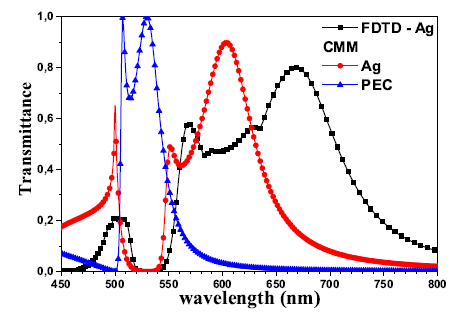

*Figure 2: Transmission spectra at normal incidence through an array of square holes($d=500$nm, $a_x=a_y=250$nm and $h=200$nm) drilled on a free-standing silver film as calculated with a "exact" numerical method (Finite Difference Time Domain, FDTD) and ME. With ME the two approximations described for simulating metal properties (PEC and SIBC) are shown.*

In Fig. 2 we present an example of transmission
spectra carried out with ME within the minimal model
approximation (only one waveguide mode inside holes) and we show how
it compares with the exact FDTD calculation. The structure is an
array of square holes defined by the parameters $d=500$nm,
$a_x=a_y=250$nm and $h=200$nm. The agreement between FDTD and ME is
good. As expected, it is better for silver than for the PEC case.
However, notice that these calculations are conducted under the
following approximation: the hole walls are considered as PEC even
when SIBC operates. In order to overcome the latter, in
Fig. 2 the hole side is actually widened as much as
one skin-depth to mimic the penetration of the EM fields into the
metal walls. A better solution consists in using the propagation
constant of the real metal waveguide.